## Questions:
1. **Customer Behavior and Preferences**:
    How does monthly data consumption vary across different age groups?
    What general patterns can be identified in data usage based on customer demographics?
2. **Customer Loyalty and Financial Performance**:
    What is the relationship between customer tenure and their overall financial contributions such as charges and revenue?
    How does the length of customer engagement correlate with their lifetime value?
3. **Service Features and Customer Churn**:
    Which categories of services are most commonly associated with higher churn rates?
    Are certain types of internet services, such as high-speed options, more prone to churn compared to others?
4. **Customer Satisfaction**:
    How does customer satisfaction influence churn rates across different service levels?
    Are there variations in churn risk based on differing levels of customer satisfaction?
5. **Marketing and Promotions**:
    Do specific types of promotional offers tend to result in higher churn rates, and what might be the reasons?
    How do different promotional strategies impact customer retention and acquisition?
6. **Customer Service**:
    How do customers generally perceive the quality of service provided?
    What improvements could be made to customer service practices to boost overall satisfaction and reduce churn?

## 01 Import liabraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# import dataset
df = pd.read_csv(r'/Users/jiaoliu/Documents/telco.csv')

## 02 Understand dataset

In [6]:
df.shape

(7043, 50)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [10]:
# Internet Type  ,Offer ,Churn Reason, Churn Category might have missing values
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [12]:
# check duplicates
df.duplicated().sum()

0

In [14]:
# colonum list
col_list = ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download','Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue','Satisfaction Score','Churn Score','CLTV']


In [16]:
filter_data = df[col_list]

In [18]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Number of Dependents               7043 non-null   int64  
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Avg Monthly GB Download            7043 non-null   int64  
 6   Monthly Charge                     7043 non-null   float64
 7   Total Charges                      7043 non-null   float64
 8   Total Refunds                      7043 non-null   float64
 9   Total Extra Data Charges           7043 non-null   int64  
 10  Total Long Distance Charges        7043 non-null   float64
 11  Total Revenue                      7043 non-null   float

In [20]:
#rename columns
filter_data = filter_data.rename(columns = {'Number of Dependents' : 'Dependents'})
filter_data = filter_data.rename(columns = {'Number of Referrals' : 'Referrals'})
filter_data = filter_data.rename(columns = {'Tenure in Months' : 'Tenure_Months'})
filter_data = filter_data.rename(columns = {'Avg Monthly Long Distance Charges' : 'avg_m_LD_Charge'})
filter_data = filter_data.rename(columns = {'Avg Monthly GB Download' : 'avg_m_GB_download'})
filter_data = filter_data.rename(columns = {'Monthly Charge' : 'Monthly_Charge'})
filter_data = filter_data.rename(columns = {'Total Charges' : 'Total_Charges'})
filter_data = filter_data.rename(columns = {'Total Refunds' : 'Total_Refunds'})
filter_data = filter_data.rename(columns = {'Total Extra Data Charges' : 'Total_ED_Charges'})
filter_data = filter_data.rename(columns = {'Total Long Distance Charges' : 'Total_LD_Charges'})
filter_data = filter_data.rename(columns = {'Total Revenue' : 'Total_Revenue'})
filter_data = filter_data.rename(columns = {'Satisfaction Score' : 'Satisfaction'})
filter_data = filter_data.rename(columns = {'Churn Score' : 'Churn'})

In [101]:
filter_data.head()

,Age,Dependents,Referrals,Tenure_Months,avg_m_LD_Charge,avg_m_GB_download,Monthly_Charge,Total_Charges,Total_Refunds,Total_ED_Charges,Total_LD_Charges,Total_Revenue,Satisfaction,Churn,CLTV,Churn Risk
0,78,0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65,3,91,5433,High churn risk
1,74,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10,3,69,5302,Medium churn risk
2,71,3,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,2,81,3179,High churn risk
3,78,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07,2,88,5337,High churn risk
4,80,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36,2,67,2793,Medium churn risk


## 03. Exploring Relationships

In [25]:
corr_matrix =filter_data.corr()

<Axes: >

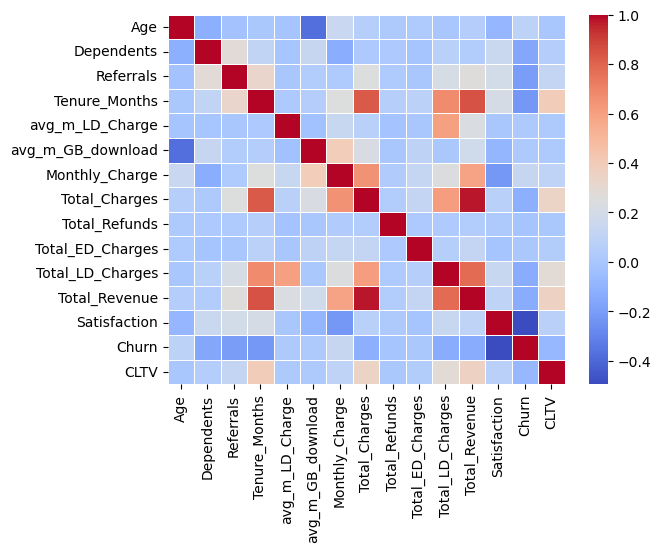

In [27]:

sns.heatmap(corr_matrix,cmap = 'coolwarm',linewidths= 0.5)


In [28]:
# Create a subset excluding the "Date" and "No" columns
# avg_m_LD_Charge,Total_Charges	,Total_Refunds,Total_ED_Charges
sub = filter_data[['Age', 'Dependents', 'Referrals', 'Tenure_Months', 
       'avg_m_GB_download', 'Monthly_Charge', 'Total_LD_Charges', 'Total_Revenue', 'Satisfaction',
       'Churn', 'CLTV']]


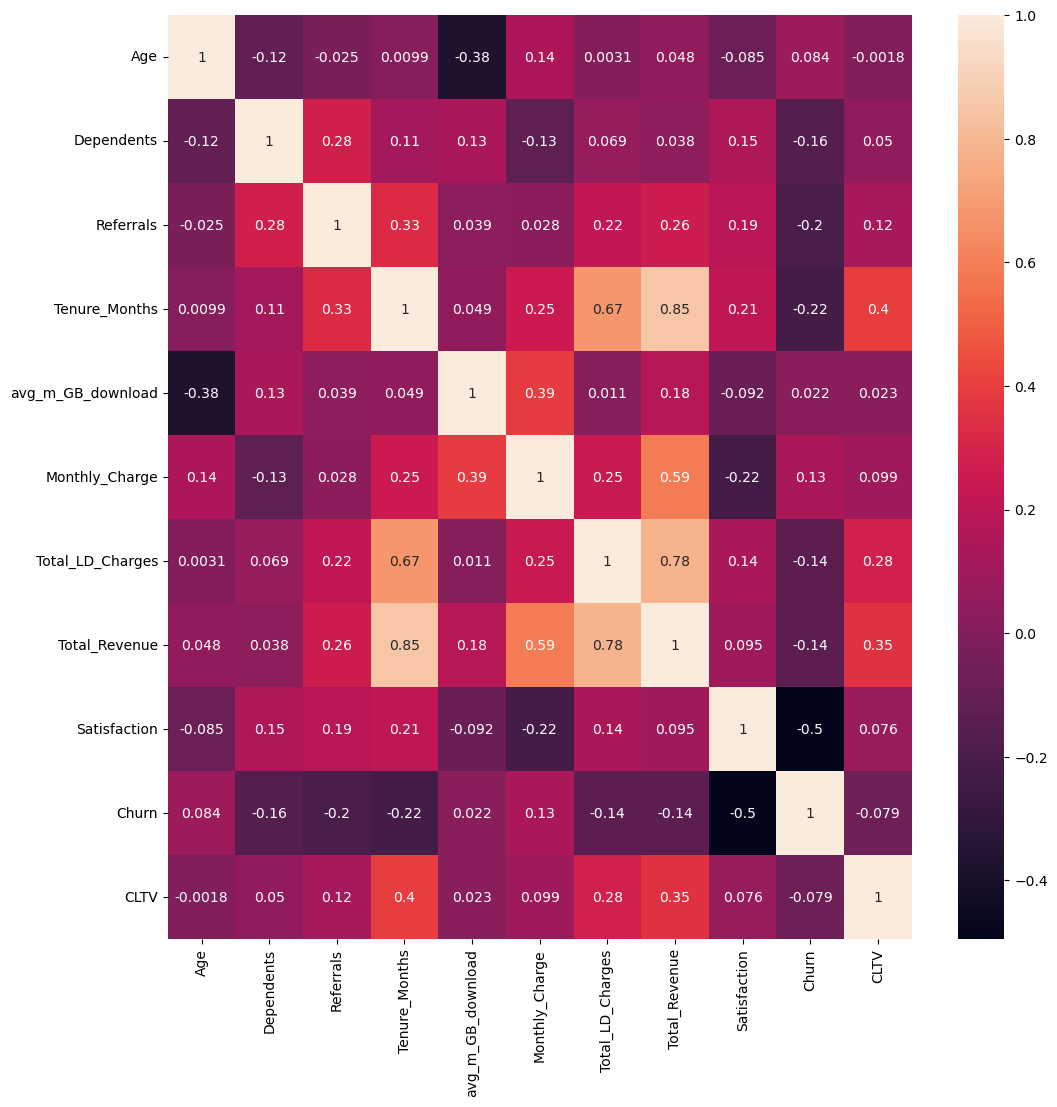

In [31]:
# Create a plot with matplotlib
f,ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the plots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

Correlation coefficients typically range from -1 to 1, where values close to ±1 indicate a strong correlation, and values between ±0.3 to ±0.7 suggest a moderate correlation.

Highly Correlated:
Tenure_Months and Total_LD_Charges: Correlation coefficient of 0.78, indicating a strong positive relationship between the length of service tenure and long-distance charges.

Tenure_Months and Total_Revenue: Correlation coefficient of 0.85, showing a strong positive relationship between service tenure and total revenue.

Monthly_Charge and Total_Revenue: Correlation coefficient of 0.59, suggesting a moderately strong positive correlation between monthly charges and total revenue.

Total_LD_Charges and Total_Revenue: Correlation coefficient of 0.78, indicating a strong positive relationship between long-distance charges and total revenue.


Moderately Correlated:

Tenure_Months and CLTV (Customer Lifetime Value): Correlation coefficient of 0.4, suggesting a moderate positive correlation between service tenure and CLTV.

Monthly_Charge and Total_LD_Charges: Correlation coefficient of 0.39, indicating a moderate positive relationship between monthly fees and long-distance charges.

Total_Revenue and CLTV: Correlation coefficient of 0.35, suggesting a moderate positive relationship between total revenue and CLTV.

Churn and Satisfaction: Correlation coefficient of -0.5, indicating a moderately strong negative correlation between customer satisfaction and churn rates.

<Axes: xlabel='Age', ylabel='avg_m_GB_download'>

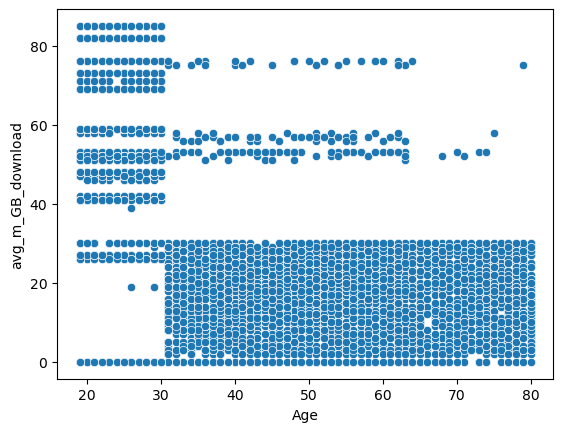

In [34]:
# Create a scatterplot for the "Age" and "Avg Monthly GB Download" columns in seaborn
sns.scatterplot(x = 'Age', y = 'avg_m_GB_download', data = filter_data)

From the Scatterplots above, we can see that between age 20-30 there is a greater average monthly GB download

<Axes: xlabel='Referrals', ylabel='Tenure_Months'>

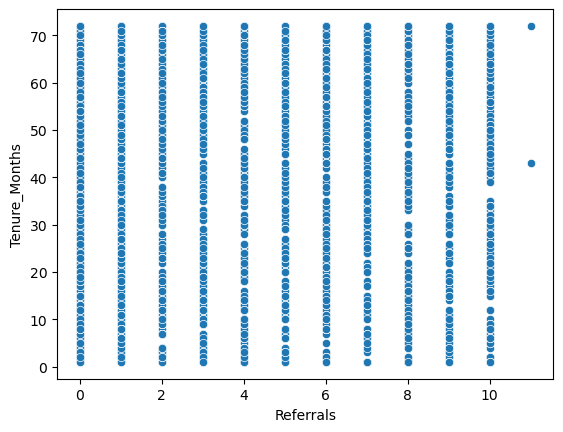

In [37]:
# Create a scatterplot for the "Referrals" and "Tenure_Months" columns in seaborn
sns.scatterplot(x = 'Referrals', y = 'Tenure_Months', data = filter_data)

<Axes: xlabel='CLTV', ylabel='Tenure_Months'>

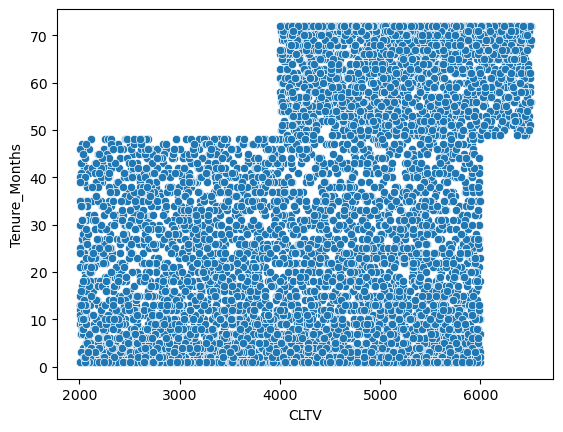

In [39]:
# Create a scatterplot for the "CLTV" and "Tenure_Months" columns in seaborn
sns.scatterplot(x = 'CLTV', y = 'Tenure_Months', data = filter_data)


<Axes: xlabel='CLTV', ylabel='Churn'>

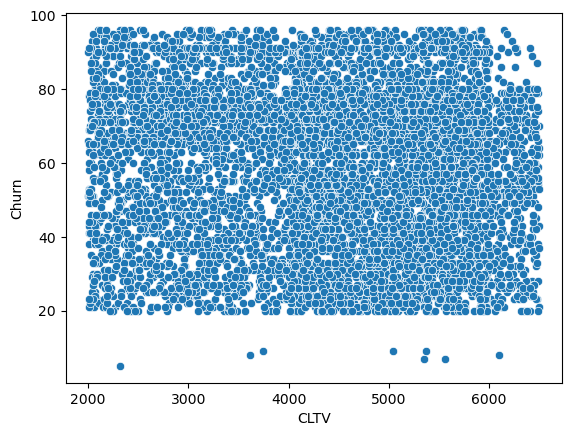

In [41]:
# Create a scatterplot for the "CLTV" and "Churn" columns in seaborn
sns.scatterplot(x = 'CLTV', y = 'Churn', data = filter_data)

## Pair plots


In [44]:
sub_2 = sub[['Age', 'Tenure_Months', 'Satisfaction', 'Churn','CLTV']]

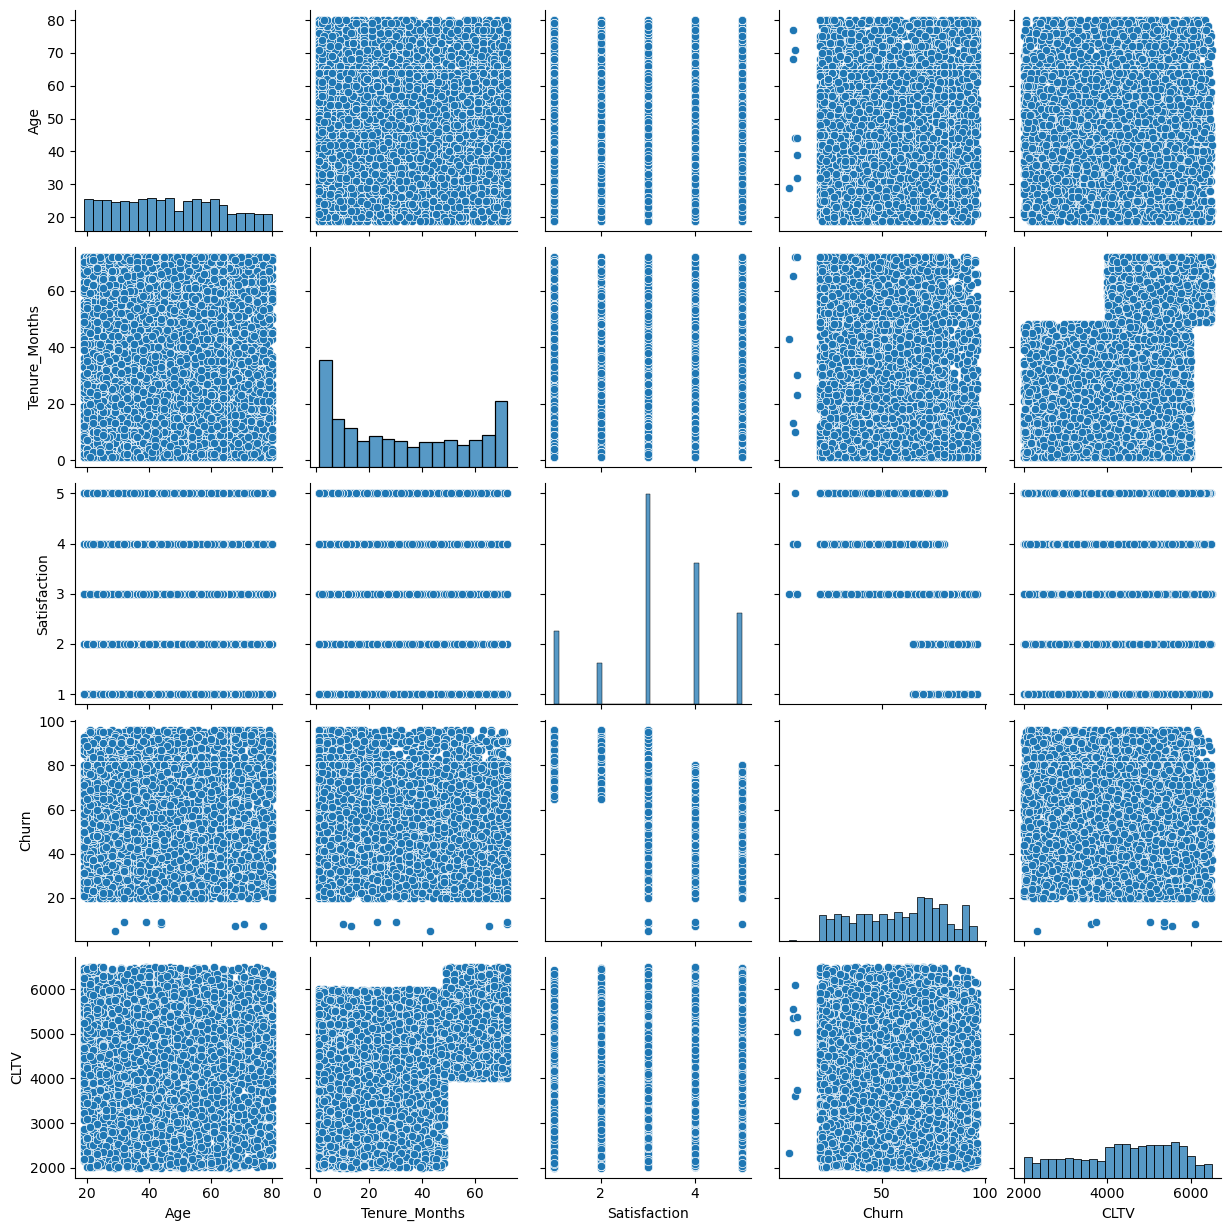

In [46]:
# Create a pair plot 
g = sns.pairplot(sub_2)

## Categorical Plots

<Axes: xlabel='Age', ylabel='Count'>

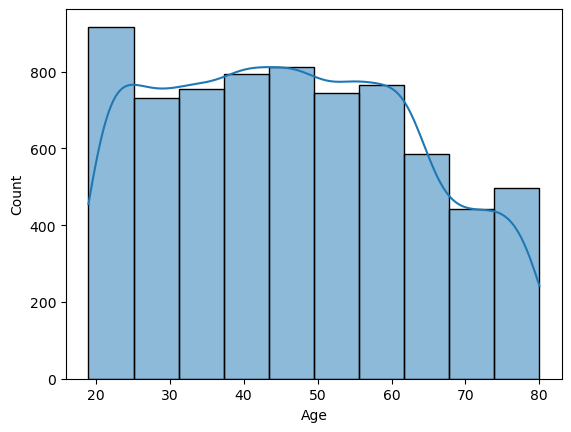

In [48]:
# Use a histogram to visualize the distribution of the variables. 
sns.histplot(filter_data['Age'], bins = 10, kde = True)

<Axes: xlabel='Tenure_Months', ylabel='Count'>

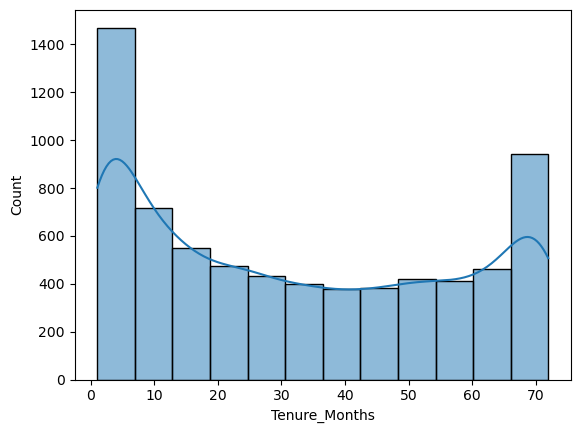

In [49]:
sns.histplot(filter_data['Tenure_Months'], bins = 12, kde = True)

<Axes: xlabel='Churn', ylabel='Count'>

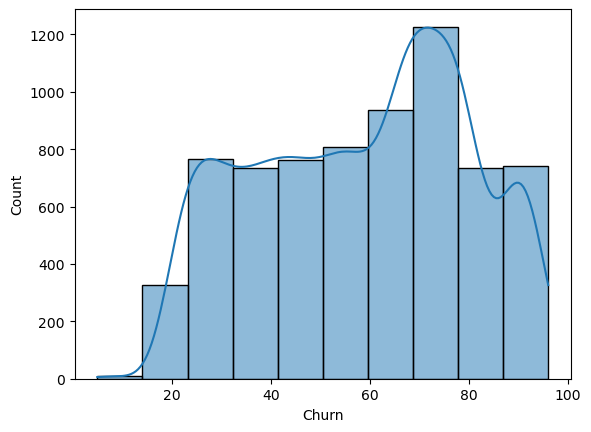

In [50]:
sns.histplot(filter_data['Churn'], bins = 10, kde = True)

In [ ]:
# catagorise customers by churn score

In [55]:
filter_data.loc[filter_data['Churn'] < 30, 'Churn Risk'] = 'Low churn risk'

In [57]:
filter_data.loc[(filter_data['Churn'] >= 30) & (filter_data['Churn'] < 70), 'Churn Risk'] = 'Medium churn risk'

In [59]:

filter_data.loc[filter_data['Churn'] >= 70, 'Churn Risk'] = 'High churn risk'

In [61]:
filter_data['Churn Risk'].value_counts(dropna = False)

Churn Risk
Medium churn risk    3615
High churn risk      2565
Low churn risk        863
Name: count, dtype: int64

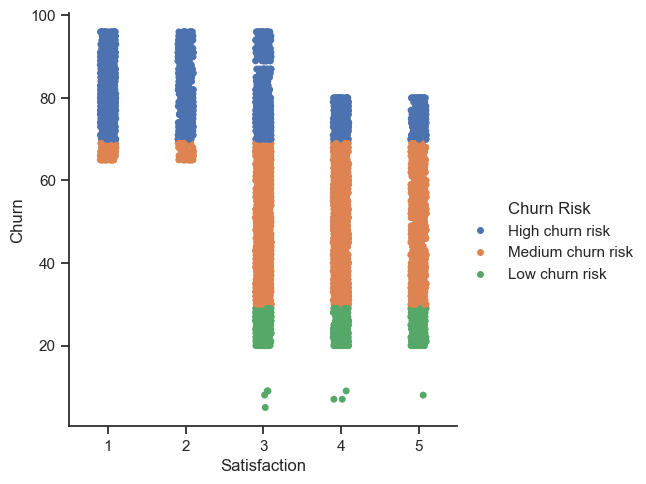

In [63]:
# Create a categorical plot in seaborn using the Churn Risk categories created above

sns.set(style="ticks")
g = sns.catplot(x="Satisfaction", y="Churn", hue="Churn Risk", data=filter_data)

This Categorical Plot shows that the customer who has low satisfaction score has a higher churn risk.

### Customer behavior 

In [67]:
pd.set_option('display.float_format', '{:.2f}'.format)


cus_status = df.groupby('Customer Status').agg({
    'Customer ID':'count',
    'Total Revenue':'sum'
})
cus_status 

,Customer ID,Total Revenue
Customer Status,,
Churned,1869,3684459.82
Joined,454,54279.75
Stayed,4720,17632392.12


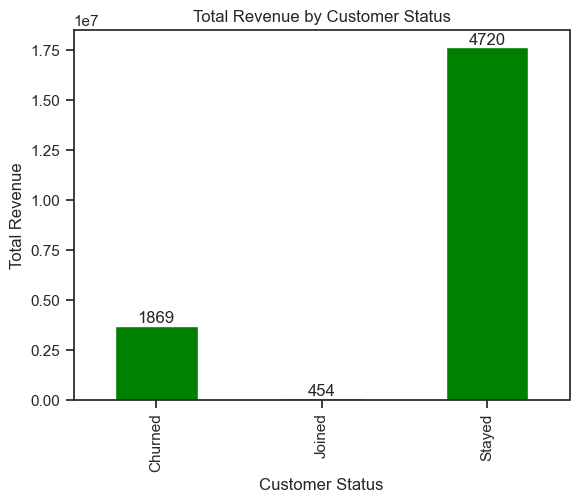

In [69]:
# plot
fig, ax = plt.subplots()
cus_status['Total Revenue'].plot(kind='bar', color='green', ax=ax)
ax.set_ylabel('Total Revenue')
ax.set_title('Total Revenue by Customer Status')

# add 'Customer ID' count to the columns
for i, value in enumerate(cus_status['Total Revenue']):
    ax.text(i, value, f'{cus_status["Customer ID"].iloc[i]}', ha='center', va='bottom')

plt.show()

In [93]:
churned_customer= df[df['Customer Status'] =='Churned']
#city_distribution = churned_customer.groupby('City').size().reset_index(name='Count')
city_distribution = churned_customer.groupby('City').agg( {'Customer ID':'count',
    'Total Revenue':'sum'})
city_distribution.sort_values(by ='Customer ID',ascending = False)

,Customer ID,Total Revenue
City,,
San Diego,185,385446.39
Los Angeles,78,147090.46
San Francisco,31,56894.27
San Jose,29,44393.49
Fallbrook,26,34691.78
...,...,...
Jamestown,1,2190.16
Ivanhoe,1,31.18
Isleton,1,91.39


The number of chruned customers grew to 1869 this quarter. San Diego's revenue counts for over 10% of the reveune which was gennrated by churned customers

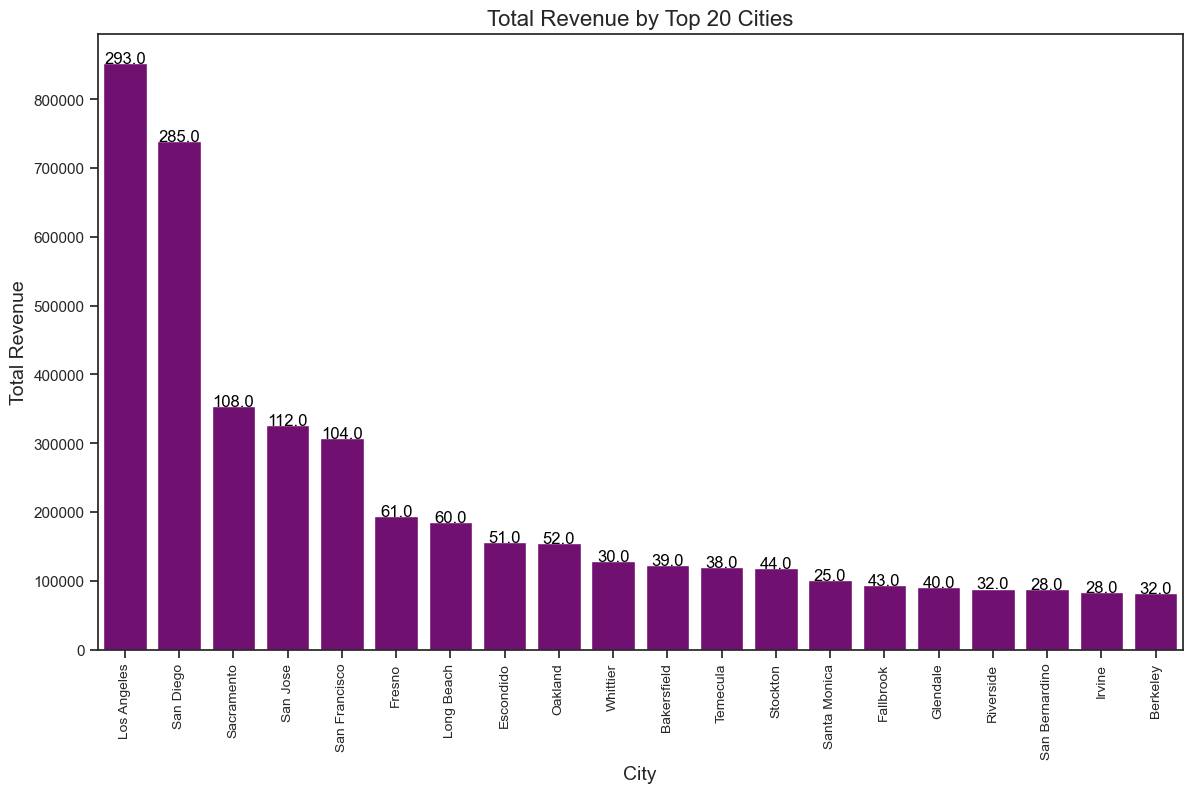

In [74]:
top_cities = grouped_city.head(20)  # top 20 cities by revenue

plt.figure(figsize=(14, 8))
bar_plot=sns.barplot(x=top_cities.index, y=top_cities['Total Revenue'],color='purple')

plt.title('Total Revenue by Top 20 Cities', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)

for index, row in top_cities.iterrows():
    bar_plot.text(row.name, row['Total Revenue'], row['Customer ID'], color='black', ha="center")

plt.show()



LA generate the most revenue(293k) follwed by SD(285k),Sacramento(108k)

In [76]:
grouped_churn=df.groupby('Churn Reason')['Customer ID'].count().sort_values(ascending = False).head()
grouped_churn=pd.DataFrame(grouped_churn)
grouped_churn

,Customer ID
Churn Reason,
Competitor had better devices,313
Competitor made better offer,311
Attitude of support person,220
Don't know,130
Competitor offered more data,117


<Axes: xlabel='Customer ID', ylabel='Churn Reason'>

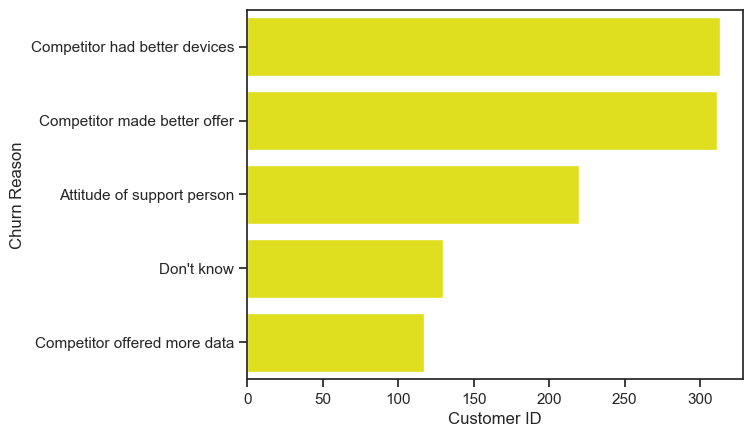

In [78]:
sns.barplot(grouped_churn,x='Customer ID',y='Churn Reason',color = 'yellow'	)

Top 2 churned resason are  competitor had better devices,competitor had better devices

In [80]:
grouped_offer =df.groupby(['Offer','Customer Status']).size().reset_index(name='Count')
grouped_offer

,Offer,Customer Status,Count
0,Offer A,Churned,35
1,Offer A,Stayed,485
2,Offer B,Churned,101
3,Offer B,Stayed,723
4,Offer C,Churned,95
5,Offer C,Stayed,320
6,Offer D,Churned,161
7,Offer D,Stayed,441
8,Offer E,Churned,426
9,Offer E,Joined,175


In [82]:
pivot_df = grouped_offer.pivot(index='Offer', columns='Customer Status', values='Count').fillna(0)
pivot_df

Customer Status,Churned,Joined,Stayed
Offer,,,
Offer A,35.0,0.0,485.0
Offer B,101.0,0.0,723.0
Offer C,95.0,0.0,320.0
Offer D,161.0,0.0,441.0
Offer E,426.0,175.0,204.0


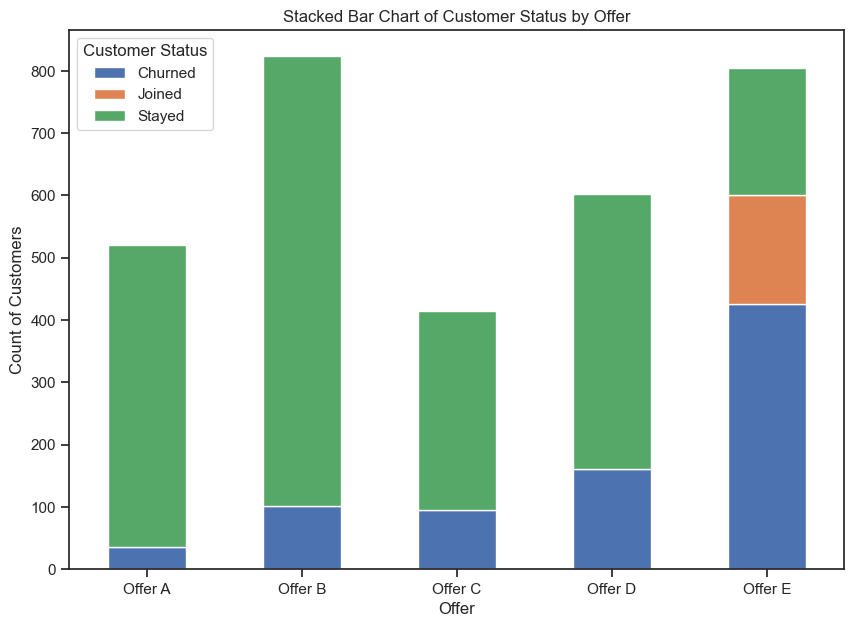

In [84]:
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))
# add title and x y labels 
plt.title('Stacked Bar Chart of Customer Status by Offer')
plt.xlabel('Offer')
plt.ylabel('Count of Customers')
plt.xticks(rotation=0)  # x ticks rotation 
plt.legend(title='Customer Status')

# show plot
plt.show()

In [ ]:
# add a column base on tenire in months

In [105]:
df.loc[df['Tenure in Months']<12,'Tenure in Year'] = '<1'
df.loc[(df['Tenure in Months']>12) & (df['Tenure in Months']<=24),'Tenure in Year'] = '1-2'
df.loc[(df['Tenure in Months']>24) & (df['Tenure in Months']<=36),'Tenure in Year'] = '2-3'
df.loc[(df['Tenure in Months']>36) & (df['Tenure in Months']<=48),'Tenure in Year'] = '3-4'
df.loc[(df['Tenure in Months']>48),'Tenure in Year'] = '>4'

In [107]:
df['Tenure in Year'].value_counts()

Tenure in Year
>4     2239
<1     2069
1-2    1024
2-3     832
3-4     762
Name: count, dtype: int64

In [109]:
# customer counts by tenure in year and custtomer status 
grouped_tenure = df.groupby(['Tenure in Year', 'Customer Status']).size().reset_index(name='Count')
grouped_tenure

,Tenure in Year,Customer Status,Count
0,1-2,Churned,294
1,1-2,Stayed,730
2,2-3,Churned,180
3,2-3,Stayed,652
4,3-4,Churned,145
5,3-4,Stayed,617
6,<1,Churned,999
7,<1,Joined,454
8,<1,Stayed,616
9,>4,Churned,213


In [100]:
# pivot customer status 
pivot_df = grouped_tenure.pivot(index='Tenure in Year', columns='Customer Status', values='Count').fillna(0)
pivot_df

Customer Status,Churned,Joined,Stayed
Tenure in Year,,,
1-2,294.0,0.0,730.0
2-3,180.0,0.0,652.0
3-4,145.0,0.0,617.0
<1,999.0,454.0,616.0
>4,213.0,0.0,2026.0


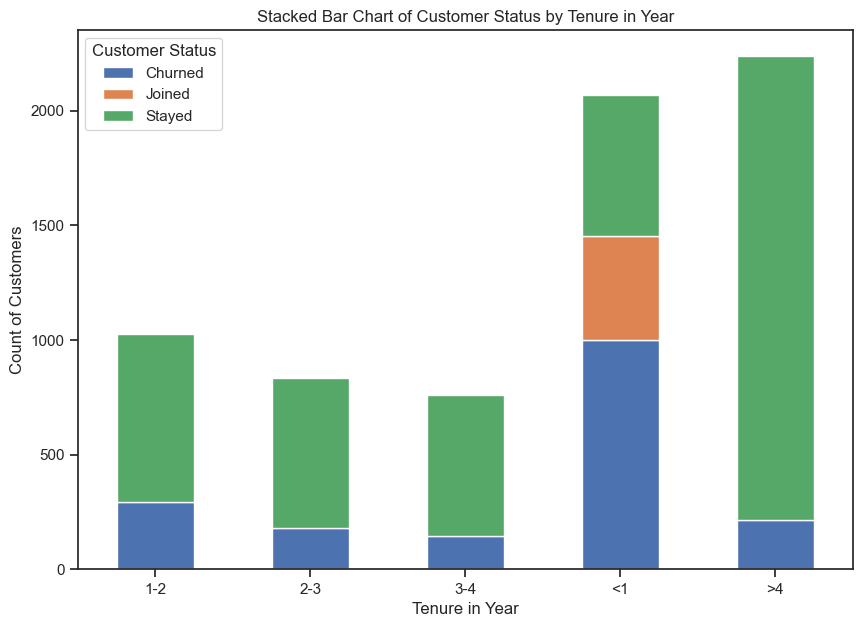

In [102]:
# plot customer count by tenure in year and customer status 
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

# add title and labels rotate the xticks
plt.title('Stacked Bar Chart of Customer Status by Tenure in Year')
plt.xlabel('Tenure in Year')
plt.ylabel('Count of Customers')
plt.xticks(rotation=0)  
plt.legend(title='Customer Status')

# show plot
plt.show()

In [ ]:
# merge all the serive subscriptions to servise type column

In [111]:
df_melted =df.melt(id_vars='Customer ID', value_vars=['Phone Service', 'Internet Service','Multiple Lines', 'Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Music'], 
                    var_name='Service Type', value_name='Subscription')

In [113]:
df_filtered = df_melted[df_melted['Subscription'] == 'Yes'].drop(columns='Subscription')

In [115]:
# merge service type column with the original dataset base on customer id 
df = pd.merge(df, df_filtered, on='Customer ID', how='left')

In [129]:
# total customer count by sercice type and Customer Status	
grouped = df.groupby(['Service Type', 'Customer Status']).size().reset_index(name = 'Count')
grouped

,Service Type,Customer Status,Count
0,Device Protection Plan,Churned,545
1,Device Protection Plan,Joined,32
2,Device Protection Plan,Stayed,1845
3,Internet Service,Churned,1756
4,Internet Service,Joined,272
5,Internet Service,Stayed,3489
6,Multiple Lines,Churned,850
7,Multiple Lines,Joined,45
8,Multiple Lines,Stayed,2076
9,Online Backup,Churned,523


In [139]:
# total customer count by service type
total_counts = df.groupby('Service Type').size().reset_index(name='Total')
total_counts

,Service Type,Total
0,Device Protection Plan,2422
1,Internet Service,5517
2,Multiple Lines,2971
3,Online Backup,2429
4,Online Security,2019
5,Phone Service,6361
6,Premium Tech Support,2044
7,Streaming Music,2488
8,Streaming TV,2707


In [133]:
# merged data which has the total count by service type and customer status with the data which has the total count by service type
merged = pd.merge(grouped, total_counts, on='Service Type')

In [135]:
merged

,Service Type,Customer Status,Count,Total
0,Device Protection Plan,Churned,545,2422
1,Device Protection Plan,Joined,32,2422
2,Device Protection Plan,Stayed,1845,2422
3,Internet Service,Churned,1756,5517
4,Internet Service,Joined,272,5517
5,Internet Service,Stayed,3489,5517
6,Multiple Lines,Churned,850,2971
7,Multiple Lines,Joined,45,2971
8,Multiple Lines,Stayed,2076,2971
9,Online Backup,Churned,523,2429


In [137]:
# the percentage of customers by service type and customer status relative to the total number of customers by service type.
merged['Percentage'] = round((merged['Count'] / merged['Total']) * 100,2)

In [126]:
merged

,Service Type,Customer Status,Count,Total,Percentage
0,Device Protection Plan,Churned,545,2422,22.50
1,Device Protection Plan,Joined,32,2422,1.32
2,Device Protection Plan,Stayed,1845,2422,76.18
3,Internet Service,Churned,1756,5517,31.83
4,Internet Service,Joined,272,5517,4.93
5,Internet Service,Stayed,3489,5517,63.24
6,Multiple Lines,Churned,850,2971,28.61
7,Multiple Lines,Joined,45,2971,1.51
8,Multiple Lines,Stayed,2076,2971,69.88
9,Online Backup,Churned,523,2429,21.53


In [141]:
# only get the percentage of churned customer 
churned_sorted = merged[merged['Customer Status'] == 'Churned'].sort_values(by='Percentage', ascending=False)

In [130]:
churned_sorted

,Service Type,Customer Status,Count,Total,Percentage
3,Internet Service,Churned,1756,5517,31.83
24,Streaming TV,Churned,814,2707,30.07
21,Streaming Music,Churned,728,2488,29.26
6,Multiple Lines,Churned,850,2971,28.61
15,Phone Service,Churned,1699,6361,26.71
0,Device Protection Plan,Churned,545,2422,22.50
9,Online Backup,Churned,523,2429,21.53
18,Premium Tech Support,Churned,310,2044,15.17
12,Online Security,Churned,295,2019,14.61


<Axes: xlabel='Percentage', ylabel='Service Type'>

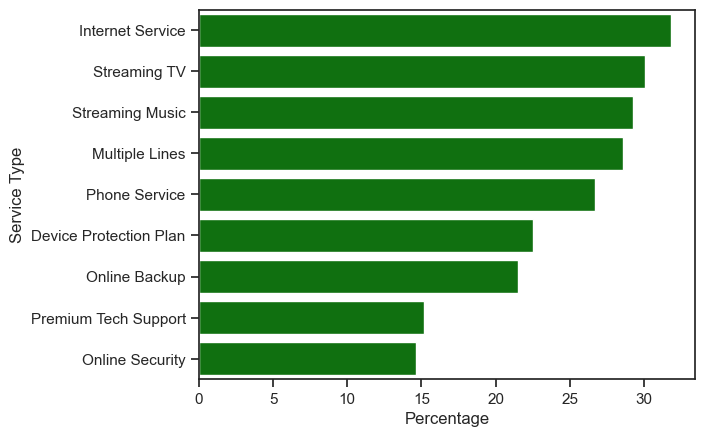

In [132]:
# plot
sns.barplot(x=churned_sorted['Percentage'] ,y=churned_sorted['Service Type'],color='green')

In [134]:
# get the percentage of churned customers within different types of internet services
grouped = df.groupby(['Internet Type', 'Customer Status']).size().reset_index(name = 'Count')

In [136]:
total_counts = df.groupby('Internet Type').size().reset_index(name='Total')

In [138]:
merged = pd.merge(grouped, total_counts, on='Internet Type')

In [140]:
merged['Percentage'] = round((merged['Count'] / merged['Total']) * 100,2)

In [142]:
merged

,Internet Type,Customer Status,Count,Total,Percentage
0,Cable,Churned,803,3876,20.72
1,Cable,Joined,176,3876,4.54
2,Cable,Stayed,2897,3876,74.74
3,DSL,Churned,1036,7704,13.45
4,DSL,Joined,314,7704,4.08
5,DSL,Stayed,6354,7704,82.48
6,Fiber Optic,Churned,5558,15510,35.83
7,Fiber Optic,Joined,332,15510,2.14
8,Fiber Optic,Stayed,9620,15510,62.02


In [144]:
merged_chrun =merged[merged['Customer Status'] == 'Churned'].sort_values(by='Percentage', ascending=False)

<Axes: xlabel='Internet Type', ylabel='Percentage'>

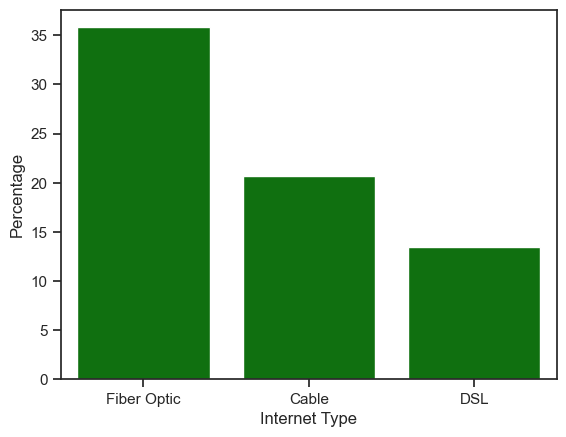

In [146]:
sns.barplot(x=merged_chrun['Internet Type'] , y=merged_chrun['Percentage'],color='green')

### This analysis covers multiple key metrics that reveal relationships between customer behavior, service types, and customer satisfaction across various dimensions:

## Key finding:
-----------------
**Service Tenure and Charges**: The data reveals a robust positive correlation between service tenure and both long-distance charges (0.78) and total revenue (0.85). This suggests that the longer customers stay, the more they contribute financially through both recurring charges and additional services like long-distance calls.

**Revenue and Monthly Charges**: The correlation between monthly charges and total revenue (0.59) highlights that monthly subscription fees are a key driver of revenue. This relationship underscores the importance of subscription pricing strategies in revenue generation.
Long-Distance Charges and Revenue: The strong correlation between long-distance charges and total revenue (0.78) indicates that long-distance services remain a significant revenue source.

**Moderate Correlations and CLTV**: Moderate correlations between tenure, total revenue, and Customer Lifetime Value (CLTV) (ranging from 0.35 to 0.4) suggest that longer tenure and higher revenue are moderately predictive of higher CLTV.

**Churn and Satisfaction**: The negative correlation (-0.5) between churn and satisfaction points to dissatisfaction as a significant predictor of customer turnover. The highest churn rates are noted among users of Fiber Optic internet services, suggesting possible issues with this service affecting customer satisfaction.

**Specific Issues Leading to Churn**: The top reasons for churn include competitors offering better devices and services. Also, specific offers like Offer E are associated with higher churn rates, indicating that these may not be aligning well with customer expectations or needs.

**Age and Usage Patterns**: Younger users, particularly those between 20-30 years old, have higher average monthly GB downloads, indicating higher data consumption that could be tied to lifestyle or tech-savviness.


## Recommendations:

**Review Pricing Strategies**: Given the strong link between monthly charges and revenue, consider reviewing pricing strategies to ensure they are competitive yet profitable, especially for services with high churn rates like Fiber Optic internet.

**Enhance Fiber Optic Services**: Address the high churn rates in Fiber Optic services by improving service reliability and customer support, and consider conducting targeted satisfaction surveys to identify specific issues.

**Improve Customer Retention Programs**: Enhance customer satisfaction and retention programs by focusing on personalized experiences and loyalty rewards, particularly for long-tenure customers, to increase their CLTV.

**Competitor Analysis and Device Offers**: Regularly analyze competitor offers and ensure that your device and service offerings are competitive. Consider introducing new features or technologies that address the reasons customers are leaving.

***Targeted Marketing for Young Users**: Capitalize on the high data usage among younger users by crafting targeted marketing campaigns focusing on data-heavy plans and promoting services like streaming that align with their consumption patterns.

**Reevaluate Offer E**: Analyze the specific aspects of Offer E leading to higher churn rates. A/B testing of new offer structures may help in understanding what changes could make these offers more attractive.

**Focus on Service Quality**: Since low satisfaction is a clear predictor of churn, prioritize improvements in service quality across all touchpoints. Regular training for customer service representatives could help enhance the quality of customer interactions.
